*   ベースディレクトリと、出力ディレクトリを設定します。

In [1]:
############################################
BaseDir      = 'IntroDDSJpn/Chap01/'
OutputDir    = '1Error-030203LineXerrYerr/'
FileBaseName = '1Error-030203LineXerrYerr'

*   Google Colabかどうかを判別し、このJupyter Notebookのあるディレクトリを特定します。

In [2]:
############################################
import sys
import os
############################################
def IsGoogleColab():
  if 'google.colab' in sys.modules:
    return True
  else:
    return False
############################################
if IsGoogleColab():
  #
  from google.colab import drive
  drive.mount('/content/drive')
  #
  IpynbDir = 'drive/My Drive/Colab Notebooks/' + BaseDir
else:
  #
  IpynbDir =  os.getcwd() + '/'
############################################
print( 'ipynb file path = %s' % IpynbDir )

ipynb file path = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap01/


*   必要なパッケージを読み込み、ファイルの出力先のディレクトリを用意します。

In [3]:
############################################
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print('matplotlib Ver.', mpl.__version__)
#
############################################
import numpy as np
print('numpy      Ver.', np.__version__)
#
############################################
import pandas as pd
print('pandas     Ver.', pd.__version__)
#
############################################
FilePath = IpynbDir + OutputDir
print( 'FilePath = %s' % FilePath )
#
if( True != os.path.isdir(FilePath) ):
    print('  making %s' % FilePath )
    os.mkdir(FilePath)
else:
    print(' %s is exist.' % FilePath )

matplotlib Ver. 3.9.2
numpy      Ver. 1.26.4
pandas     Ver. 2.2.3
FilePath = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap01/1Error-030203LineXerrYerr/
  making d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap01/1Error-030203LineXerrYerr/


最確値を書式化して文字列として返す関数
```
Format_MostProbableValue( v_mean, v_std, s_unit, std_2digits=True, latex=False )
```
*   返値: 書式化された文字列を返す。
*   v_mean: 平均値
*   v_std:  標準偏差
*   s_unit: 値の単位(文字列)
*   std_2digit=True: 標準偏差を2桁表示。Falseにすると1桁表示
*   latex=False: テキスト文字列として出力。Trueでは、図などでlatex表示できる文字列で出力。

In [4]:
def Format_MostProbableValue( v_mean, v_std, s_unit, std_2digits=True, latex=False ):
  #
  # 平均値の冪数
  order_mean = np.floor( np.log10(v_mean) )
  # print( 'order_mean=', order_mean )
  #
  # 標準偏差の冪数
  if std_2digits:
    # 標準偏差を有効2桁表示
    order_std  = np.floor( np.log10(v_std) - 1.0 )
  else:
    # 標準偏差を有効1桁表示
    order_std  = np.floor( np.log10(v_std) - 0.0 )
  # print( 'order_std=', order_std )
  #
  # 平均値の冪数と標準偏差の冪数の符号が同じか?
  if order_mean * order_std > 0.0:
    # 例1
    # v_mean = 4.60572E5
    # v_std  = 8.96E3
    # 例2
    # v_mean = 4.605723E-2
    # v_std  = 8.96E-5
    multi_order = order_std+1
    #
    # 共通する冪数
    multi = 10.0**multi_order
    #
    # 共通する冪数で規格化
    v_mean = v_mean / multi
    v_std  = v_std  / multi
    #
    # 共通した冪数で指数をくくって、係数は少数第1位
    if latex:
      out_str = r'(%+.1f $\pm$ %.1f)$\times10^{%+d}$ ' % (v_mean, v_std, multi_order) + s_unit
    else:
      out_str = '(%+.1f +/- %.1f)x10^(%+d) ' % (v_mean, v_std, multi_order) + s_unit
    #
  else:
    # 平均値の冪数と標準偏差の冪数の符号が異なる
    # 例2
    # v_mean = 4.605723
    # v_std  = 0.0896
    fmt_std1 = r'$%%+.%df$' % -order_std
    fmt_std2 = r'$%%.%df$'  % -order_std
    if latex:
      fmt_str = fmt_std1 + r' $\pm$ ' + fmt_std2 + ' ' + s_unit
    else:
      fmt_str = fmt_std1 + ' +/- ' + fmt_std2 + ' ' + s_unit
    #
    out_str = fmt_str % (v_mean, v_std)
  #
  return out_str

解析対象のデータをExcelファイルから読み込む

In [5]:
############################################
# Excelファイルからデータを読み込み、arrayに
# 変換する
#
df_Rdata = pd.read_excel(IpynbDir + FileBaseName + '-LSQMdata05.xlsx' )
#
x_i      = np.array( df_Rdata['x_length'    ] )
sigma_xi = np.array( df_Rdata['x_sigma'     ] )
x_set    = [ x_i, sigma_xi ]
#
y_i      = np.array( df_Rdata['y_resistance'] )
sigma_yi = np.array( df_Rdata['y_sigma'     ] )
#

データと解析結果を描く関数

In [6]:
############################################
def GrfLineXerrYerr( Data_sets, label_x=r'$x$', label_y=r'$y$', title=r'$y=ax+b$' ):
  #
  plt.rcParams['font.size'] = 24
  #
  fig = plt.figure( figsize=(12,8) )
  #
  fig.subplots_adjust(left=0.12, right=0.65, top=0.90, bottom=0.12)
  #
  ax1 = fig.add_subplot(1,1,1)
  ax1.set_xlabel( label_x )
  ax1.set_ylabel( label_y )
  #
  for Data_set in Data_sets:
    #
    Xdata  = Data_set[0]
    Xsigma = Data_set[1]
    #
    Ydata  = Data_set[2]
    Ysigma = Data_set[3]
    Ylabel = Data_set[4]
    Ymode  = Data_set[5]
    Ycolor = Data_set[6]
    #
    if Ysigma is not None:
        if Xsigma is not None:
          # plot / errorbar
          ax1.errorbar( Xdata, Ydata, xerr=Xsigma, yerr=Ysigma, color=Ycolor, fmt='o', markersize=10, capsize=5, label=Ylabel )
        else:
          # plot / errorbar
          ax1.errorbar( Xdata, Ydata, yerr=Ysigma, color=Ycolor, fmt='o', markersize=10, capsize=5, label=Ylabel )
    else:
      if Ymode == 1:
        # plot / solid line
        ax1.plot( Xdata, Ydata, color=Ycolor, linewidth=2.0, linestyle='solid', label=Ylabel )
      elif  Ymode == 2:
        # plot / dashed
        ax1.plot( Xdata, Ydata, color=Ycolor, linewidth=2.0, linestyle='dashed', label=Ylabel )
      elif  Ymode == 3:
        # plot / dotted
        ax1.plot( Xdata, Ydata, color=Ycolor, linewidth=2.0, linestyle='dotted', label=Ylabel )
      else:
        # scatter
        ax1.scatter( Xdata, Ydata, color=Ycolor, s=20.0, label=Ylabel )
    #
  #
  # # x_mean
  # ax1.axvline( x_mean, 0, 1.0, color='black', linestyle='dotted', label=r'$\overline{x}$' )
  # #
  # # y_mean
  # ax1.axhline( y_mean, 0, 1.0, color='black', linestyle='dotted', label=r'$\overline{y}$' )
  #
  plt.title( title )
  plt.legend( fontsize=16,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0 )
  #
  plt.show()
  #
  return fig

############################################
def GrfLineWeight( Xdata, Ysets, x_mean, y_mean, label_x=r'$x$', label_y=r'$y$', title=r'$y=ax+b$' ):
  #
  plt.rcParams['font.size'] = 24
  #
  fig = plt.figure( figsize=(12,8) )
  #
  fig.subplots_adjust(left=0.12, right=0.65, top=0.90, bottom=0.12)
  #
  ax1 = fig.add_subplot(1,1,1)
  ax1.set_xlabel( label_x )
  ax1.set_ylabel( label_y )
  #
  for Yset in Ysets:
    #
    Ydata  = Yset[0]
    Ysigma = Yset[1]
    Ylabel = Yset[2]
    Ymode  = Yset[3]
    Ycolor = Yset[4]
    #
    if Ysigma is not None:
        # plot / errorbar
        ax1.errorbar( Xdata, Ydata, yerr=Ysigma, color=Ycolor, fmt='o', markersize=10, capsize=5, label=Ylabel )
    else:
      if Ymode == 1:
        # plot / solid line
        ax1.plot( Xdata, Ydata, color=Ycolor, linewidth=2.0, linestyle='solid', label=Ylabel )
      elif  Ymode == 2:
        # plot / dashed
        ax1.plot( Xdata, Ydata, color=Ycolor, linewidth=2.0, linestyle='dashed', label=Ylabel )
      elif  Ymode == 3:
        # plot / dotted
        ax1.plot( Xdata, Ydata, color=Ycolor, linewidth=2.0, linestyle='dotted', label=Ylabel )
      else:
        # scatter
        ax1.scatter( Xdata, Ydata, color=Ycolor, s=20.0, label=Ylabel )
    #
  #
  # x_mean
  ax1.axvline( x_mean, 0, 1.0, color='black', linestyle='dotted', label=r'$\overline{x}$' )
  #
  # y_mean
  ax1.axhline( y_mean, 0, 1.0, color='black', linestyle='dotted', label=r'$\overline{y}$' )
  #
  plt.title( title )
  plt.legend( fontsize=16,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0 )
  #
  plt.show()
  #
  return fig

############################################
def GrfLine( Xdata, Ysets, x_mean, y_mean, title=r'$y=ax+b$' ):
  #
  plt.rcParams['font.size'] = 24
  #
  fig = plt.figure( figsize=(12,8) )
  #
  fig.subplots_adjust(left=0.12, right=0.65, top=0.90, bottom=0.12)
  #
  ax1 = fig.add_subplot(1,1,1)
  ax1.set_xlabel( r'$x$' )
  ax1.set_ylabel( r'$y$' )
  #
  for Yset in Ysets:
    #
    Ydata  = Yset[0]
    Ysigma = Yset[1]
    Ylabel = Yset[2]
    Ymode  = Yset[3]
    Ycolor = Yset[4]
    #
    if Ymode == 1:
      # plot / solid line
      ax1.plot( Xdata, Ydata, color=Ycolor, linewidth=2.0, linestyle='solid', label=Ylabel )
    elif  Ymode == 2:
      # plot / dashed
      ax1.plot( Xdata, Ydata, color=Ycolor, linewidth=2.0, linestyle='dashed', label=Ylabel )
    elif  Ymode == 3:
      # plot / dotted
      ax1.plot( Xdata, Ydata, color=Ycolor, linewidth=2.0, linestyle='dotted', label=Ylabel )
    else:
      # scatter
      ax1.scatter( Xdata, Ydata, color=Ycolor, s=20.0, label=Ylabel )
    #
  #
  # x_mean
  ax1.axvline( x_mean, 0, 1.0, color='black', linestyle='dotted', label=r'$\overline{x}$' )
  #
  # y_mean
  ax1.axhline( y_mean, 0, 1.0, color='black', linestyle='dotted', label=r'$\overline{y}$' )
  #
  plt.title( title )
  plt.legend( fontsize=16,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0 )
  #
  plt.show()
  #
  return fig

解析対象のデータのグラフを描画

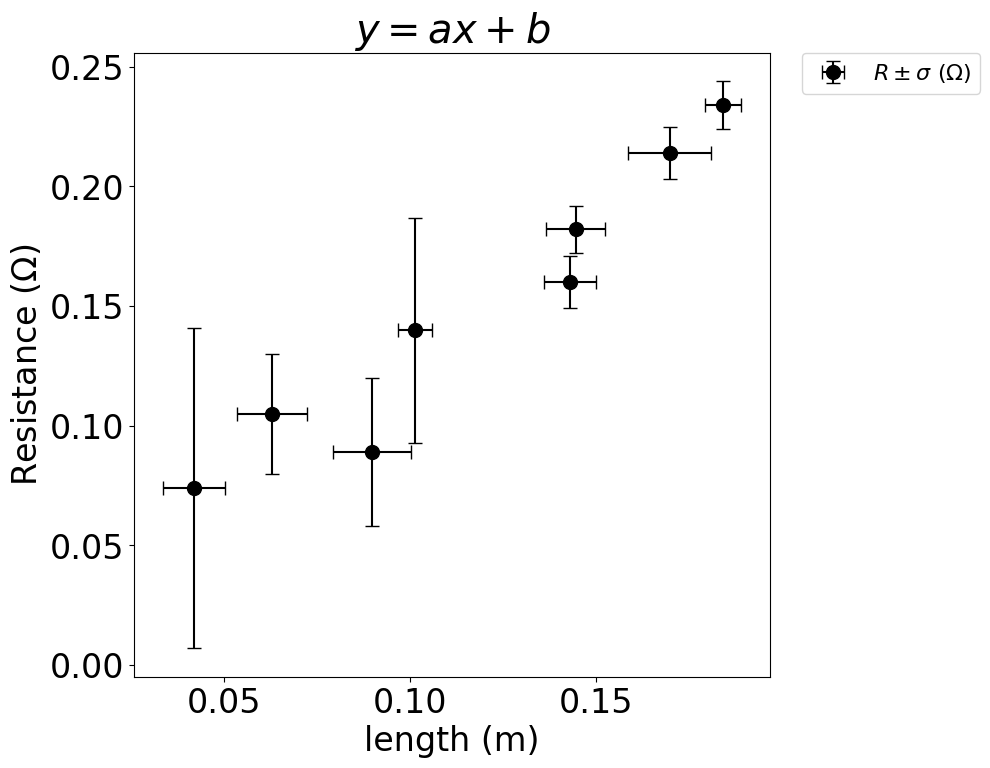

In [7]:
############################################
Rdatas = [ [ x_i, sigma_xi, y_i, sigma_yi, r'$R\pm\sigma~(\Omega)$', 0, 'black' ] ]
#
fig = GrfLineXerrYerr( Rdatas, label_x=r'length (m)', label_y=r'Resistance ($\Omega$)', title=r'$y=ax+b$' )
#
fig.savefig( FilePath + FileBaseName + '-01.pdf' )

1.3.2

(3) $x_{m}$, $y_{m}$の誤差が異なる場合の直線回帰

* 各測定値の標準偏差の逆二乗を荷重として用いる
* $x$軸の荷重
  $$
    w_{x1}:\cdots:w_{xm}
    =
    \frac{1}{\sigma_{x1}^{2}}:\cdots:\frac{1}{\sigma_{xm}^{2}},
    \quad
    W_{x}
    \equiv
    \sum^{M}w_{xm}
  $$
* $y$軸の荷重
  $$
    w_{y1}:\cdots:w_{ym}
    =
    \frac{1}{\sigma_{y1}^{2}}:\cdots:\frac{1}{\sigma_{ym}^{2}},
    \quad
    W_{y}
    \equiv
    \sum^{M}w_{ym}
  $$
* $y$軸値の荷重和
  $$
    \overline{y} = \sum^{M} w_{ym}\,y_{m}
  $$

In [8]:
############################################
# x軸 荷重
w_xi = 1/(sigma_xi**2)
#
# x軸 荷重の和
W_x = np.sum( w_xi )
#
# y軸 荷重
w_yi = 1/(sigma_yi**2)
#
# x軸 荷重の和
W_y = np.sum( w_yi )
#
############################################
overline_y = np.sum( w_yi * y_i )

【漸近法】

まず$X_{i}$の初期値として測定値の$x_{i}$を用いる。

1. 現在の$X_{i}$を用いて以下を計算する。
  $$
  \overline{X}     = \sum^{M}w_{ym}\,X_{m},\;\;\;\;\;\;
  \overline{X^{2}} = \sum^{M}w_{ym}\,X_{m}^{2},\;\;\;\;\;\;
  \overline{Xy}    = \sum^{M}w_{ym}X_{m}y_{m}
  $$

  $$
  \Delta = W_{y}\overline{X^{2}} - (\overline{X})^{2}
  $$

  これらを用いて$a$,$b$を計算する。
  $$
  a
  =
  \frac{1}{\Delta}
  \left(
    W_y \overline{Xy}-\overline{X}\overline{y}
  \right),
  \quad
  b
  =
  \frac{1}{\Delta}
  \left(
    \overline{X^{2}}\overline{y}-\overline{X}\,\overline{Xy}
  \right)
  $$

2. $a$, $b$を次式に代入し、$X_{i}$を更新する。
  $$
  X_{m}
  =
  \frac{
    w_{xm}x_{m}+a(y_{m}-b)w_{ym}
  }{
    w_{xm}+a^{2}w_{ym}
  }
  $$

3. $a$, $b$が収束するまで1., 2.を繰り返す。

以下のプログラムでは、1回のループ$\ell$での$a$, $b$値の更新において、以下の条件で収束判定をしている。
$$
\frac{a_{\ell}-a_{\ell-1}}{a_{\ell}},\,
\frac{b_{\ell}-a_{\ell-1}}{b_{\ell}}>1.0\times10^{-6}
$$

In [9]:
############################################
X_i = np.copy( x_i )
#
loops    = 0
max_loop = 100
#
a_prev  = 0.0
b_prev  = 0.0
a_rerr  = 1.0
b_rerr  = 1.0
#
rel_err = 1.0E-6
#
while (loops < max_loop) & ( (a_rerr>rel_err) | (b_rerr>rel_err) ) :
  #
  overline_X  = np.sum( w_yi * X_i )
  overline_X2 = np.sum( w_yi * X_i**2 )
  overline_Xy = np.sum( w_yi * X_i * y_i )
  #
  Delta       = W_y * overline_X2 - overline_X**2
  #
  a = (W_y * overline_Xy - overline_X * overline_y) / Delta
  b = (overline_X2 * overline_y - overline_X * overline_Xy) / Delta
  a_rerr = np.abs( (a - a_prev) / a )
  b_rerr = np.abs( (b - b_prev) / b )
  #
  X_i_str = '['
  for XX_i in X_i:
    X_i_str = X_i_str + '%.8f ' % XX_i
  #
  X_i_str = X_i_str + ']'
  #
  print( '%04d: X_i = %s, a=%+.8f, b=%+.8f, a_rerr=%.2E, b_rerr=%.2E' % (loops, X_i_str, a, b, a_rerr, b_rerr)  )
  #
  X_i = ( w_xi * x_i + a * (y_i - b) * w_yi ) / ( w_xi + a**2 * w_yi)
  #
  a_prev = a
  b_prev = b
  #
  loops = loops + 1
#
Y_i = a * X_i + b

0000: X_i = [0.04190000 0.06280000 0.08980000 0.10140000 0.14290000 0.14450000 0.16980000 0.18410000 ], a=+1.24364060, b=-0.00047747, a_rerr=1.00E+00, b_rerr=1.00E+00
0001: X_i = [0.04232689 0.06674977 0.08710974 0.10156872 0.13756168 0.14559453 0.17143787 0.18530263 ], a=+1.24543515, b=-0.00063059, a_rerr=1.44E-03, b_rerr=2.43E-01
0002: X_i = [0.04232897 0.06675926 0.08710606 0.10156861 0.13752791 0.14555262 0.17136227 0.18526480 ], a=+1.24602798, b=-0.00066874, a_rerr=4.76E-04, b_rerr=5.71E-02
0003: X_i = [0.04232942 0.06676060 0.08710333 0.10156843 0.13751290 0.14553386 0.17133115 0.18524959 ], a=+1.24624387, b=-0.00067930, a_rerr=1.73E-04, b_rerr=1.55E-02
0004: X_i = [0.04232952 0.06676061 0.08710194 0.10156833 0.13750640 0.14552571 0.17131817 0.18524332 ], a=+1.24632785, b=-0.00068259, a_rerr=6.74E-05, b_rerr=4.82E-03
0005: X_i = [0.04232954 0.06676049 0.08710129 0.10156828 0.13750362 0.14552222 0.17131272 0.18524070 ], a=+1.24636182, b=-0.00068373, a_rerr=2.73E-05, b_rerr=1.68E-0

解析結果をグラフで描画

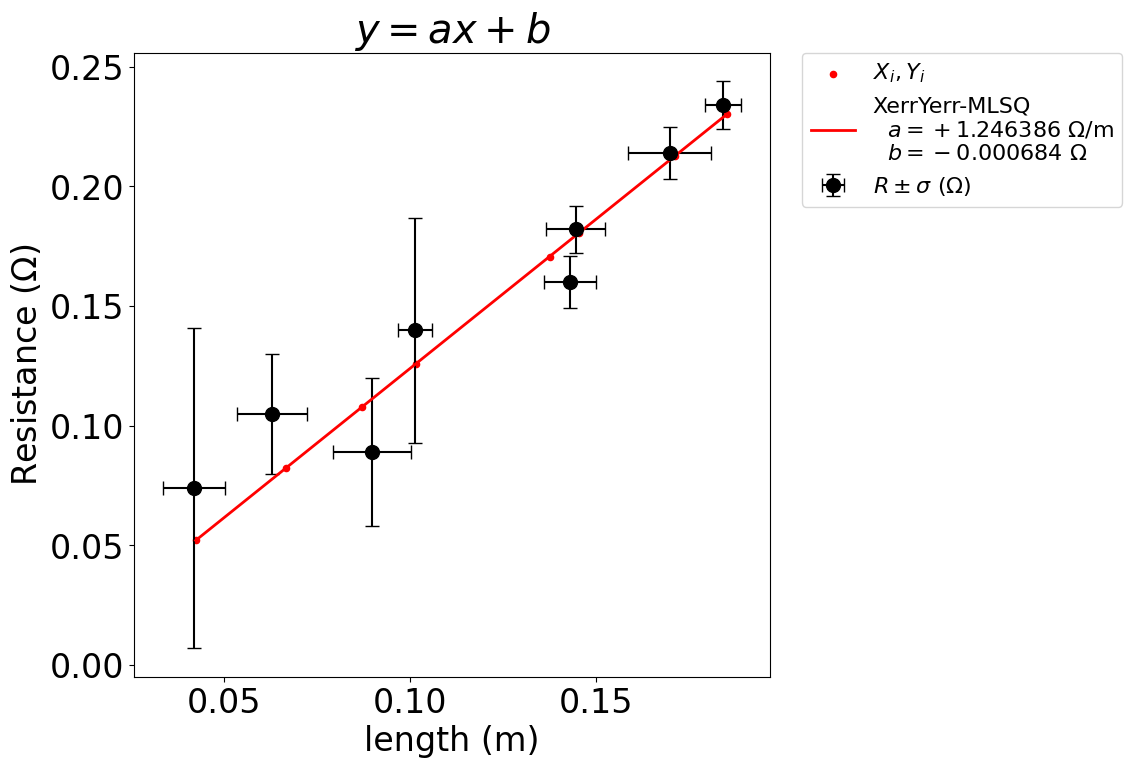

In [ ]:
############################################
#
lable_MLSQ = 'XerrYerr-MLSQ\n  ' + r'$a=%+.6f~\Omega/{\rm{}m}$' % a + '\n  ' + r'$b=%+.6f~\Omega$' % b
Rdatas = [ [ x_i, sigma_xi, y_i, sigma_yi, r'$R\pm\sigma~(\Omega)$', 0, 'black' ],
           [ X_i, None,     Y_i, None,     r'$X_{i}, Y_{i}$',        4, 'red'   ],
           [ X_i, None,     Y_i, None,     lable_MLSQ,               1, 'red'   ]]
#
fig = GrfLineXerrYerr( Rdatas, label_x=r'length (m)', label_y=r'Resistance ($\Omega$)', title=r'$y=ax+b$' )
#
fig.savefig( FilePath + FileBaseName + '-02.pdf' )